Dataset with students data extracted from Unir archive.  
Geodataframes extracted from the openlibraries https://datosabiertos.esri.co/ and https://sites.google.com/site/seriescol/shapes

# Libraries and datasets loading

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

# Default plot size is set.
plt.rcParams['figure.figsize'] = [15, 15]

# Geodataframes and dataset are loaded
geodata = gpd.read_file('geodata-NarinoPutumayo-SpaceSyntax.gpkg')

dfinal = pd.read_csv('df_uni_eval.csv')

# 1.- Dataset with Spatial Data and Predictive Deserted Variable

Data has been already processed:
- Predictive Value "DESERTED" (Related with ULTIMA_MATRICULA & ULTIMO_SEMESTRE)
- Students (total) = 18092
- Remained (0) = 8330 which is 46.04% of the total
- Deserted (1) = 9762 which is 53.96% of the total  
  
Direction data was counterclockwise translated: NE = 1, NW = 2, SW = 3, SE = 4

In [2]:
dfinal

,ESTRATO,EDAD,INGRESO_FAMILIAR,BIOLOGIA,CIENCIAS_NATURALES,LECTURA_CRITICA,LENGUA_Y_LITERATURA,LENGUAJE,APTITUD_VERBAL,ESPANOL_Y_LITERATURA,...,Direction to closest centroid,Northing Average to centroids,Easting Average to centroid,Direction Average to centroid,area,perimeter,centroid_x,centroid_y,Mcluster,DESERTED
0,1,36,800000.0,42.3,NaN,NaN,NaN,29.66,NaN,NaN,...,3,-6375.13,9691.52,4,2.208051e+08,61090.47136,608946.0741,677212.4821,0,0
1,2,24,2000000.0,52.0,NaN,NaN,NaN,54.00,NaN,NaN,...,3,-6375.13,9691.52,4,2.208051e+08,61090.47136,608946.0741,677212.4821,0,0
2,2,27,2400000.0,54.0,NaN,NaN,NaN,53.00,NaN,NaN,...,3,-6375.13,9691.52,4,2.208051e+08,61090.47136,608946.0741,677212.4821,0,0
3,1,19,6000000.0,NaN,40.0,44.0,NaN,NaN,NaN,NaN,...,3,-6375.13,9691.52,4,2.208051e+08,61090.47136,608946.0741,677212.4821,0,0
4,1,29,3500000.0,34.0,NaN,NaN,NaN,43.00,NaN,NaN,...,3,-6375.13,9691.52,4,2.208051e+08,61090.47136,608946.0741,677212.4821,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18087,1,37,0.0,38.0,NaN,NaN,NaN,43.00,NaN,NaN,...,1,5767.89,8846.12,1,5.958198e+08,142768.25530,524189.6304,733955.6956,1,1
18088,1,33,200000.0,20.0,NaN,NaN,NaN,20.00,NaN,NaN,...,1,5767.89,8846.12,1,5.958198e+08,142768.25530,524189.6304,733955.6956,1,1
18089,2,24,1500000.0,61.0,NaN,NaN,NaN,50.00,NaN,NaN,...,3,3462.82,-79074.92,2,3.924152e+09,341318.90300,796040.2145,574040.6735,4,0
18090,2,24,1500000.0,61.0,NaN,NaN,NaN,50.00,NaN,NaN,...,3,3462.82,-79074.92,2,3.924152e+09,341318.90300,796040.2145,574040.6735,4,0


# 2.- Expanded data analysis

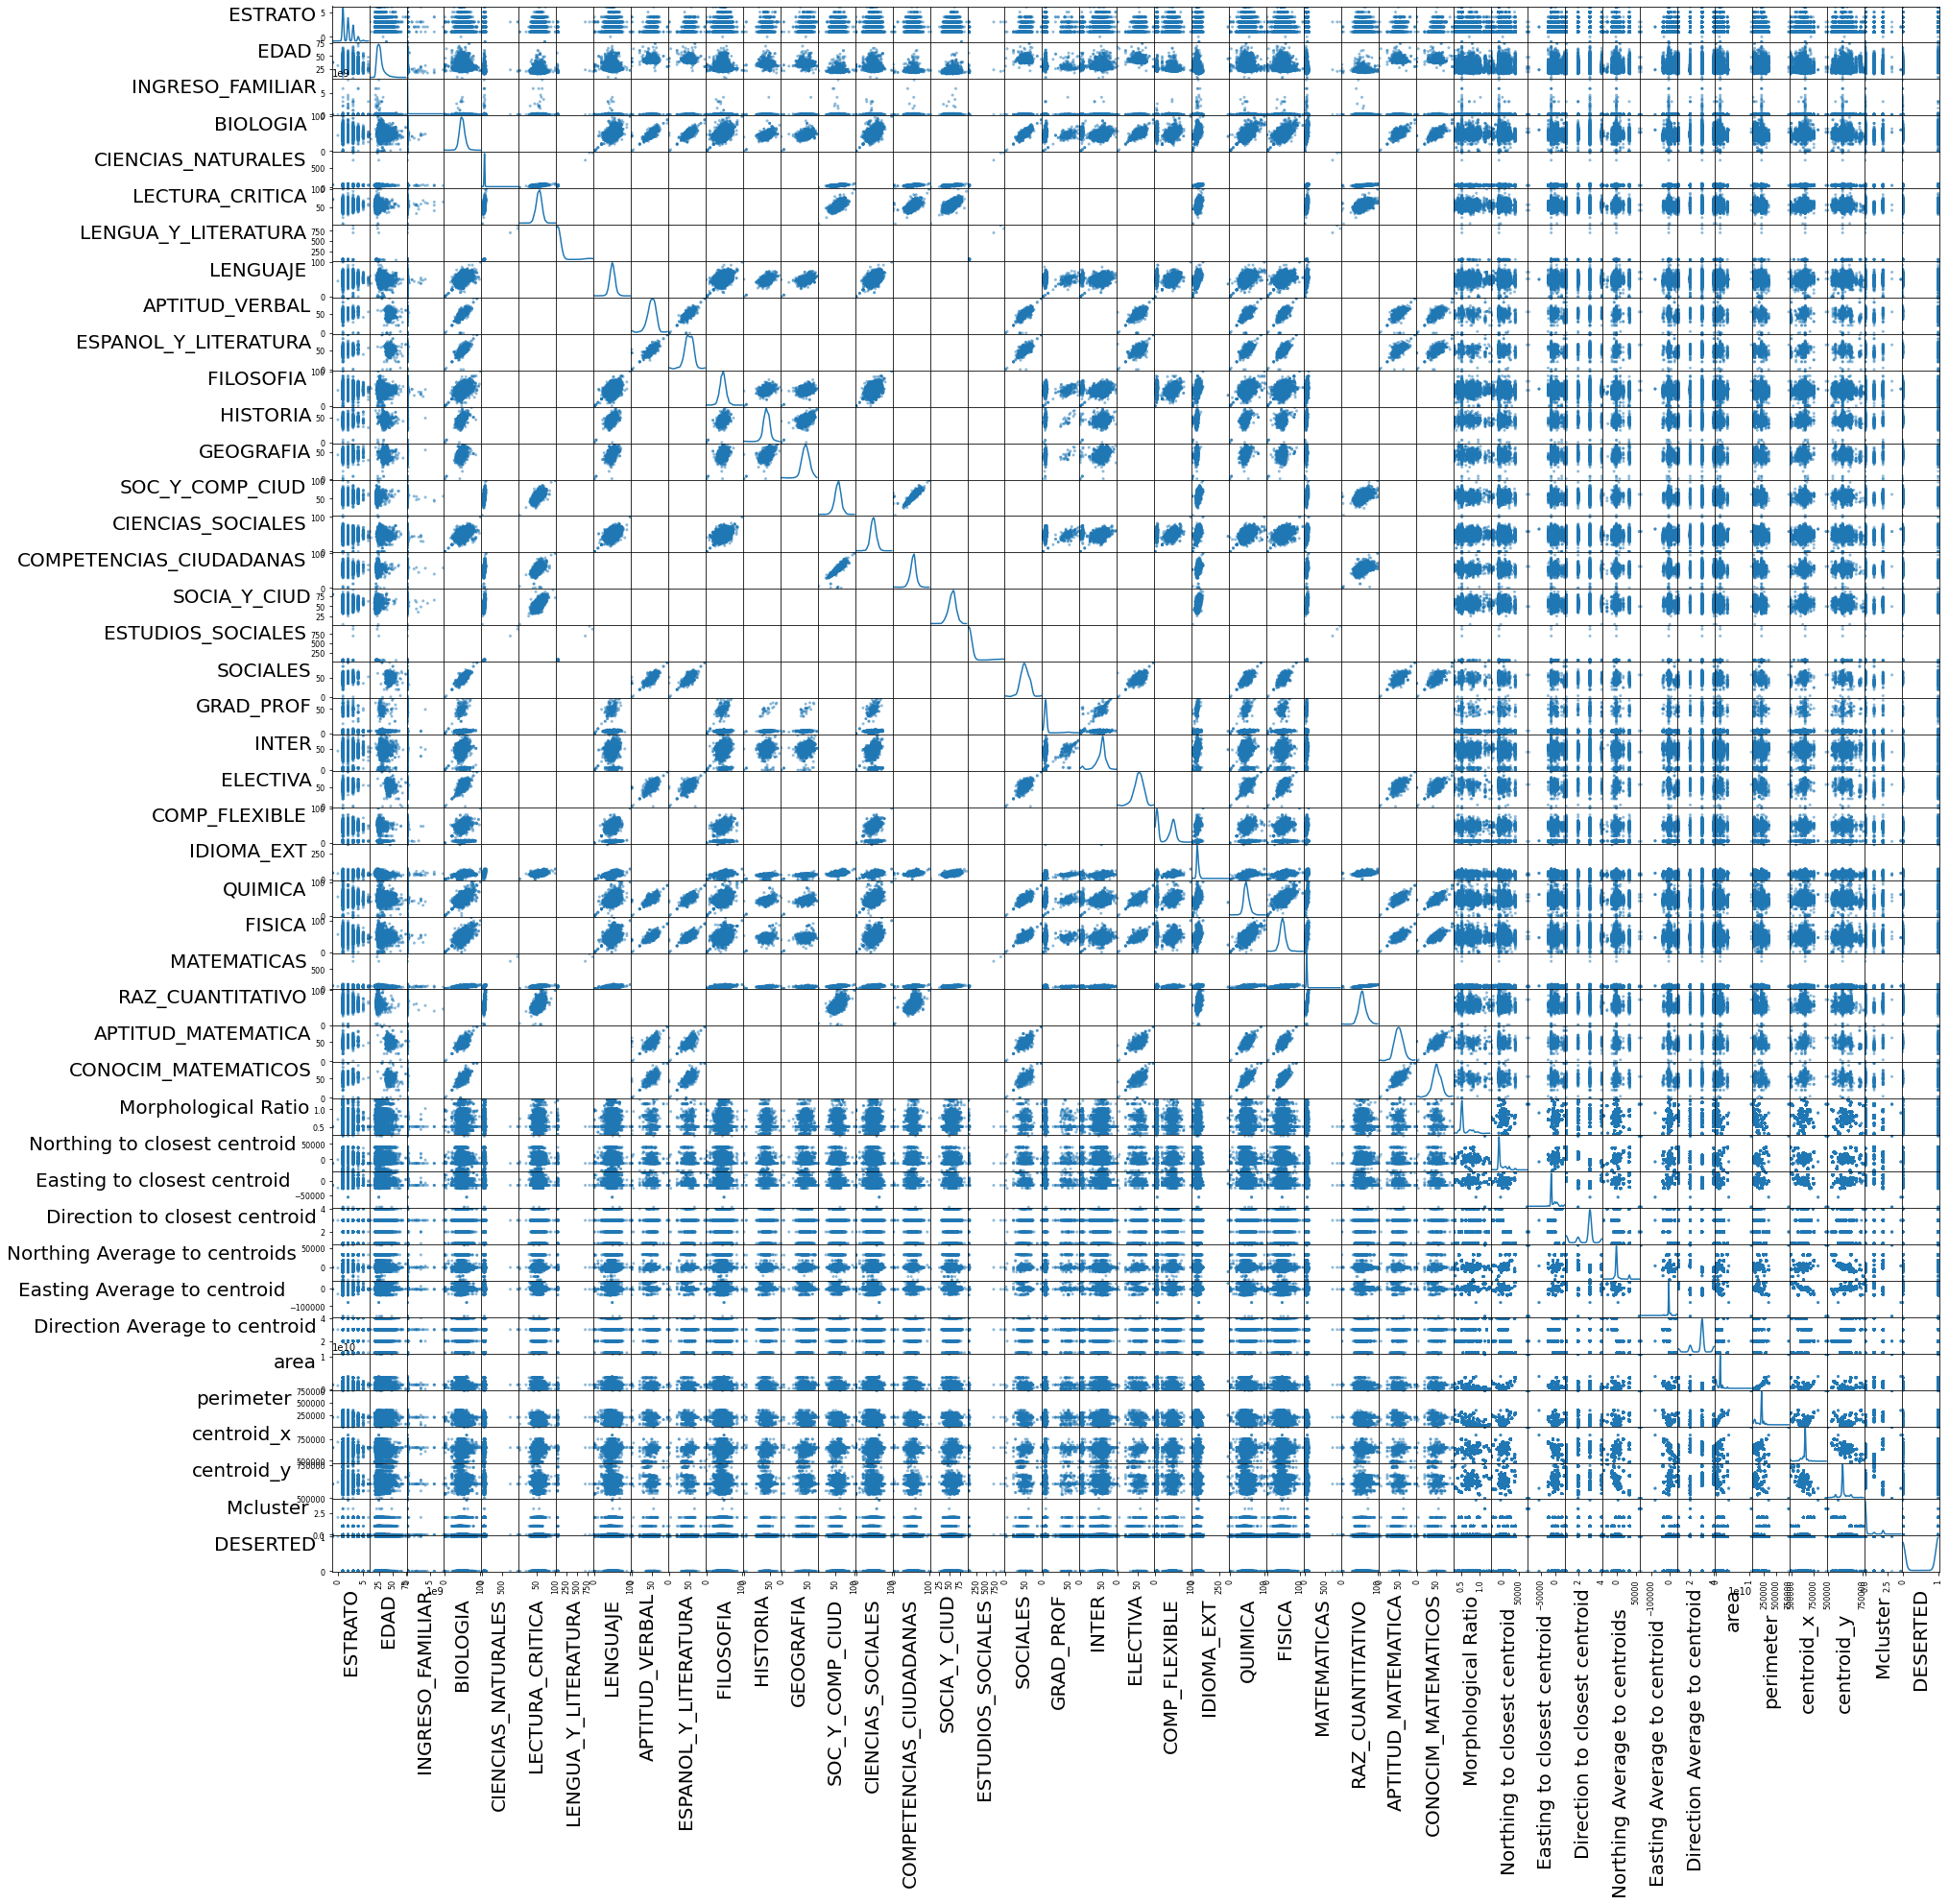

In [3]:
# Scatter matrix
scatter_matrix = pd.plotting.scatter_matrix(
    dfinal,
    figsize  = [30, 30],
    diagonal = "kde"
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0, ha='right')
    
plt.savefig("scatter_matrix_Expanded.jpg")

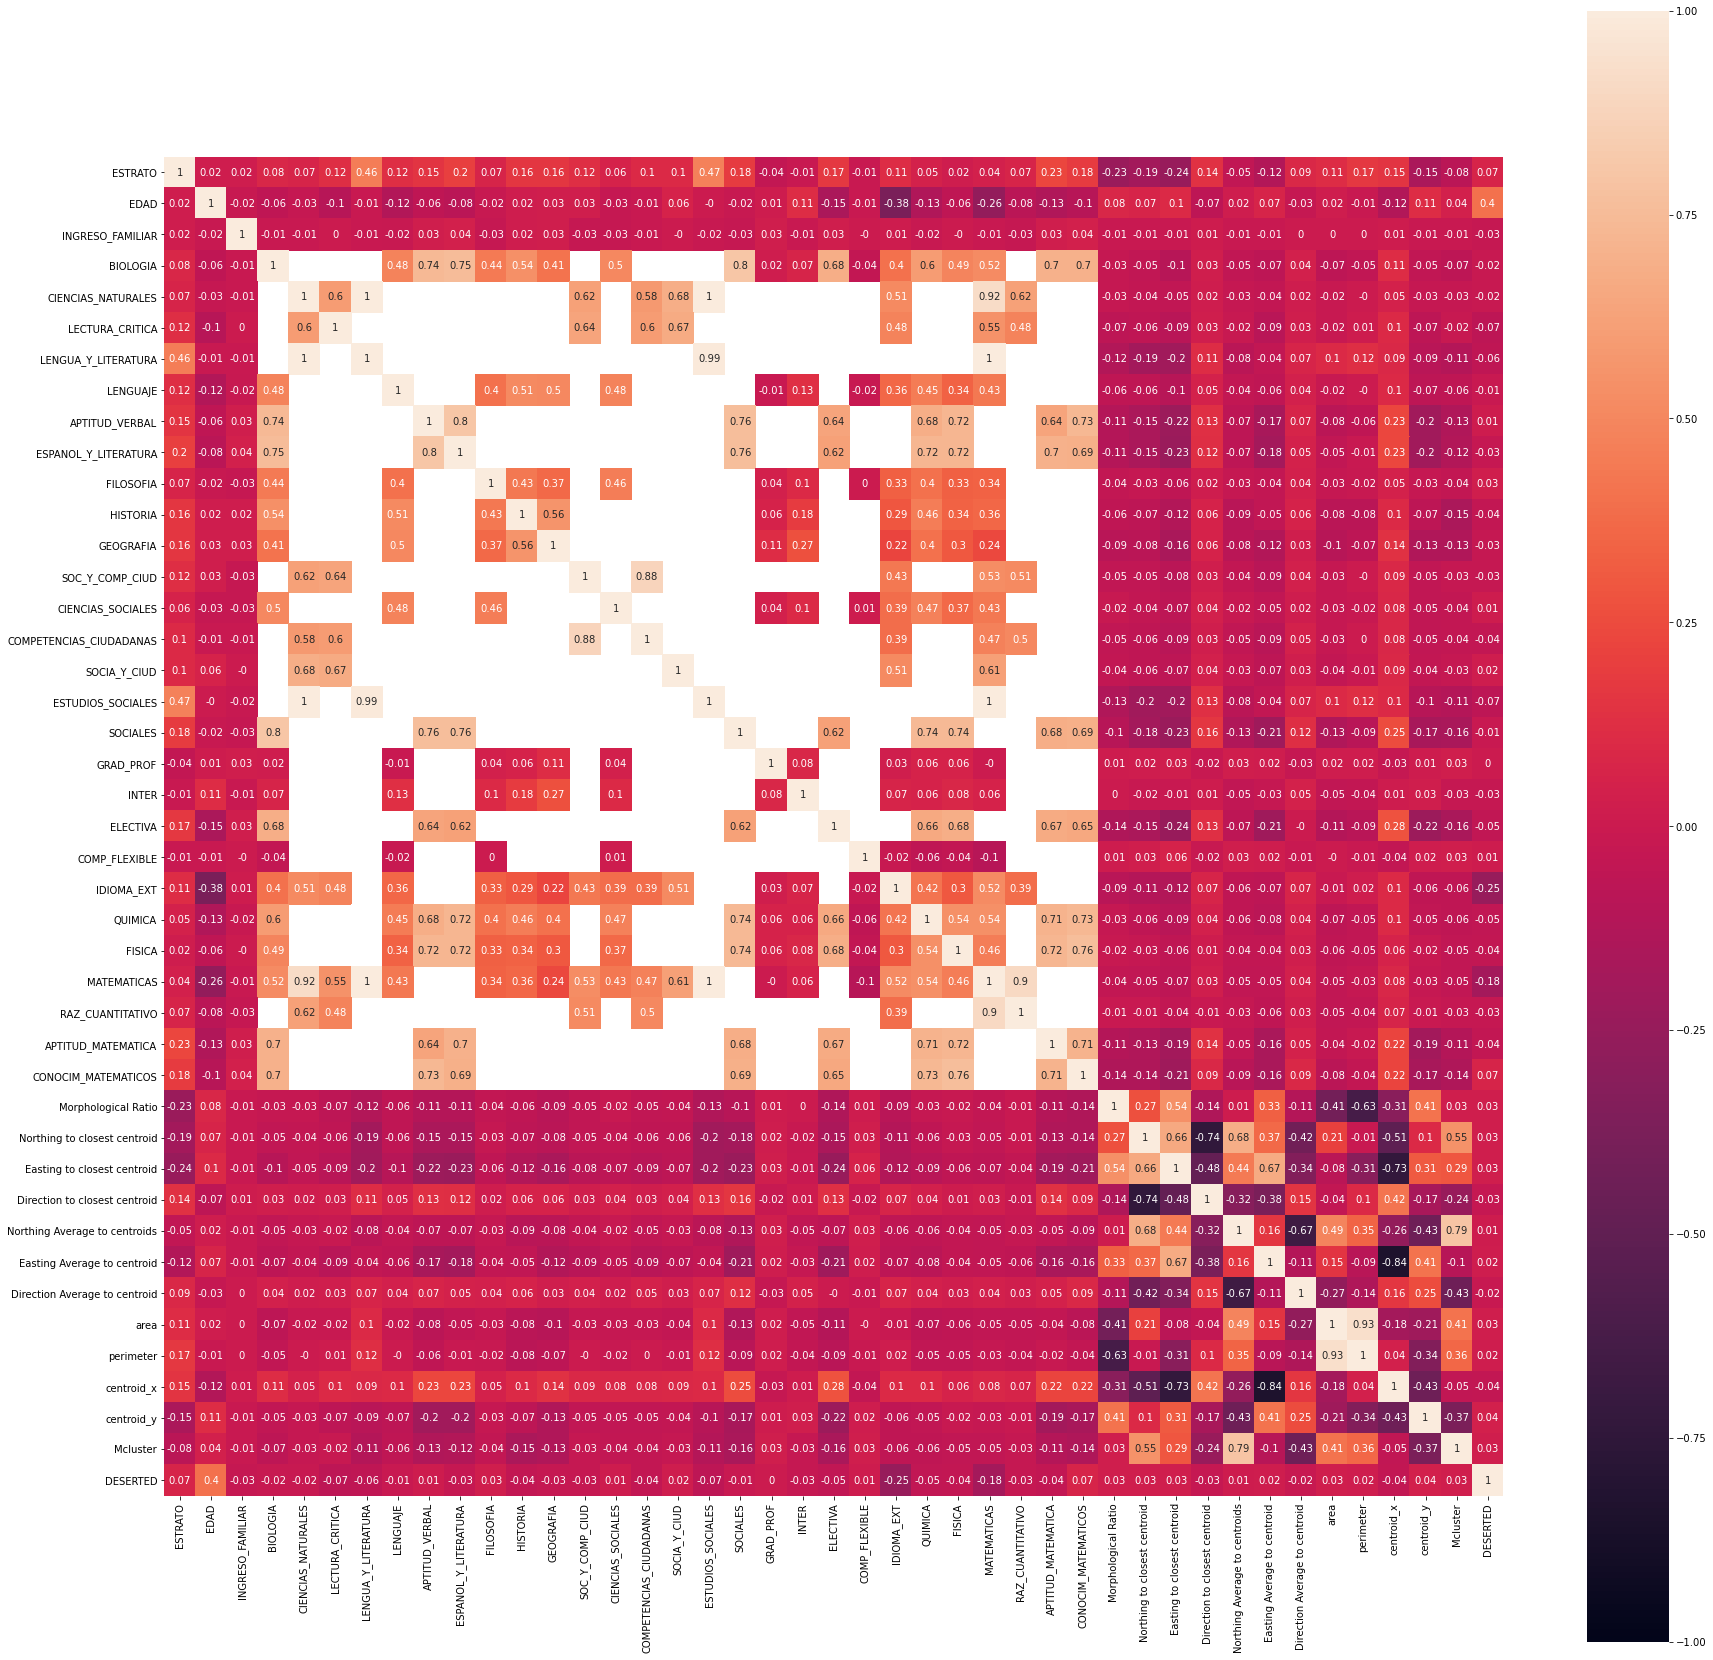

In [4]:
import seaborn as sb 

# Correlation matrix
corrMatrix = dfinal.corr()

plt.rcParams['figure.figsize'] = 30, 30
data = np.round(corrMatrix, 2)
sb.heatmap(data, annot = True, vmin=-1, vmax=1, square=True) 
plt.savefig('correlation_matrix_Expanded.pdf') 

# 3.- Random Forests analysis

In [2]:
# Numerical columns 
cols = dfinal.columns   
num_cols =  dfinal._get_numeric_data()

## 3.1. CLASSIFICATION TEST WITHOUT SPATIAL DATA

In [5]:
import numpy as np
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Test without spatial data
no_needed = ['DESERTED','Morphological Ratio','Northing to closest centroid','Easting to closest centroid',
             'Direction to closest centroid','Northing Average to centroids','Easting Average to centroid',
             'Direction Average to centroid','area','perimeter','centroid_x','centroid_y','Mcluster']

X = num_cols.drop(no_needed, axis=1)     #X_Variables, all but the label
y = num_cols['DESERTED']                 #y_Labels to classify
X = np.nan_to_num(X)
y = np.nan_to_num(y)

clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X, y)

X = X.reshape(-X.shape[0],X.shape[1])
y_pred = clf.predict(X)
print('MAE', metrics.mean_absolute_error(y, y_pred))  
print('MSE', metrics.mean_squared_error(y, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print("-----------------------------------------------------")
print('Confusion Matrix:')
print(metrics.confusion_matrix(y, y_pred) )
print(metrics.classification_report(y, y_pred) )

MAE 0.08943179305770506
MSE 0.08943179305770506
RMSE: 0.2990514889742318
-----------------------------------------------------
Confusion Matrix:
[[7459  871]
 [ 747 9015]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      8330
           1       0.91      0.92      0.92      9762

    accuracy                           0.91     18092
   macro avg       0.91      0.91      0.91     18092
weighted avg       0.91      0.91      0.91     18092



C:\Users\Alejandro\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


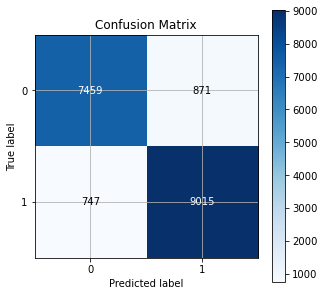

In [6]:
import scikitplot.plotters as skplt
plt.rcParams['figure.figsize'] = [5, 5]
skplt.plot_confusion_matrix(y, y_pred)
plt.show()

Random Classifier line:  ROC AUC=0.500
RF Without Spatial Data: ROC AUC=0.793


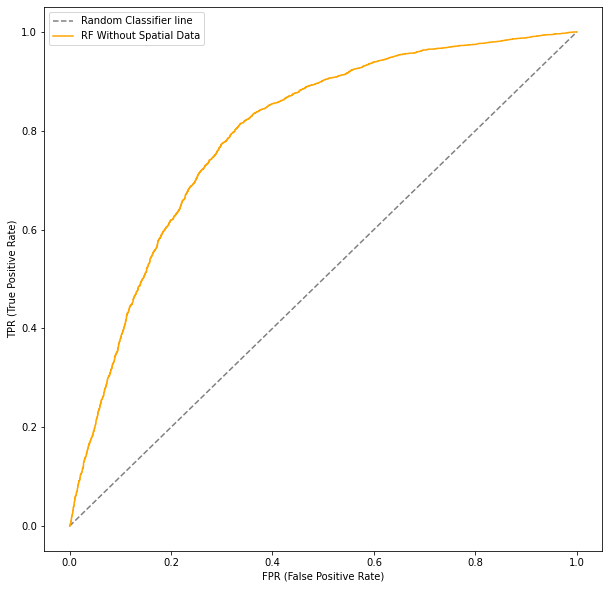

In [7]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

plt.rcParams['figure.figsize'] = [10, 10]

# Test without spatial data
no_needed = ['DESERTED','Morphological Ratio','Northing to closest centroid','Easting to closest centroid',
             'Direction to closest centroid','Northing Average to centroids','Easting Average to centroid',
             'Direction Average to centroid','area','perimeter','centroid_x','centroid_y','Mcluster']

X = num_cols.drop(no_needed, axis=1)     #X_Variables, all but the label
y = num_cols['DESERTED']                 #y_Labels to classify
X = np.nan_to_num(X)
y = np.nan_to_num(y)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
model = RandomForestClassifier(max_depth=20, random_state=0)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('Random Classifier line:  ROC AUC=%.3f' % (ns_auc))
print('RF Without Spatial Data: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', color= "grey", label='Random Classifier line')
pyplot.plot(lr_fpr, lr_tpr, color= "orange", label='RF Without Spatial Data')
# axis labels
pyplot.xlabel('FPR (False Positive Rate)')
pyplot.ylabel('TPR (True Positive Rate)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 3.2. CLASSIFICATION TEST WITH SPATIAL DATA

In [8]:
import numpy as np
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Test with spatial data
X = num_cols.drop('DESERTED', axis=1) #X_Variables, all but the label
y = num_cols['DESERTED']              #y_Labels to classify
X = np.nan_to_num(X)
y = np.nan_to_num(y)

clf = RandomForestClassifier(max_depth=20, random_state=0)
y_score = clf.fit(X, y)

X = X.reshape(-X.shape[0],X.shape[1])
y_pred = clf.predict(X)
print('MAE', metrics.mean_absolute_error(y, y_pred))  
print('MSE', metrics.mean_squared_error(y, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print("-----------------------------------------------------")
print('Confusion Matrix:')
print(metrics.confusion_matrix(y, y_pred) )
print(metrics.classification_report(y, y_pred) )

MAE 0.10800353747512713
MSE 0.10800353747512713
RMSE: 0.32863891655603894
-----------------------------------------------------
Confusion Matrix:
[[7239 1091]
 [ 863 8899]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      8330
           1       0.89      0.91      0.90      9762

    accuracy                           0.89     18092
   macro avg       0.89      0.89      0.89     18092
weighted avg       0.89      0.89      0.89     18092



C:\Users\Alejandro\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


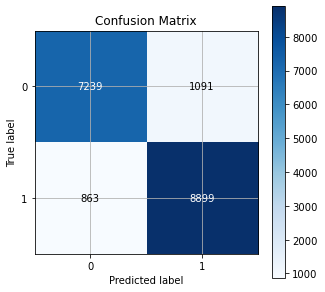

In [9]:
import scikitplot.plotters as skplt
plt.rcParams['figure.figsize'] = [5, 5]
skplt.plot_confusion_matrix(y, y_pred)
plt.show()

Random Classifier line: ROC AUC=0.500
RF With Spatial Data:   ROC AUC=0.796


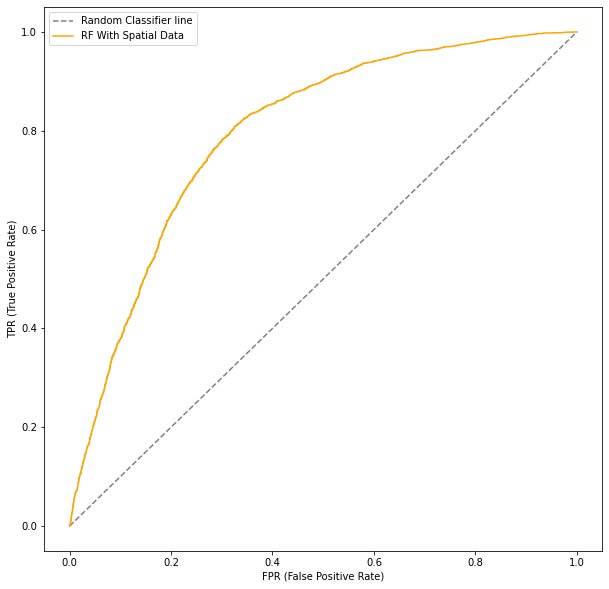

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

plt.rcParams['figure.figsize'] = [10, 10]

# Test with spatial data
X = num_cols.drop('DESERTED', axis=1) #X_Variables, all but the label
y = num_cols['DESERTED']              #y_Labels to classify
X = np.nan_to_num(X)
y = np.nan_to_num(y)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
model = RandomForestClassifier(max_depth=20, random_state=0)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('Random Classifier line: ROC AUC=%.3f' % (ns_auc))
print('RF With Spatial Data:   ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', color= "grey", label='Random Classifier line')
pyplot.plot(lr_fpr, lr_tpr, color= "orange", label='RF With Spatial Data')
# axis labels
pyplot.xlabel('FPR (False Positive Rate)')
pyplot.ylabel('TPR (True Positive Rate)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [11]:
import time
import numpy as np

start_time = time.time()
importances = model.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.031 seconds


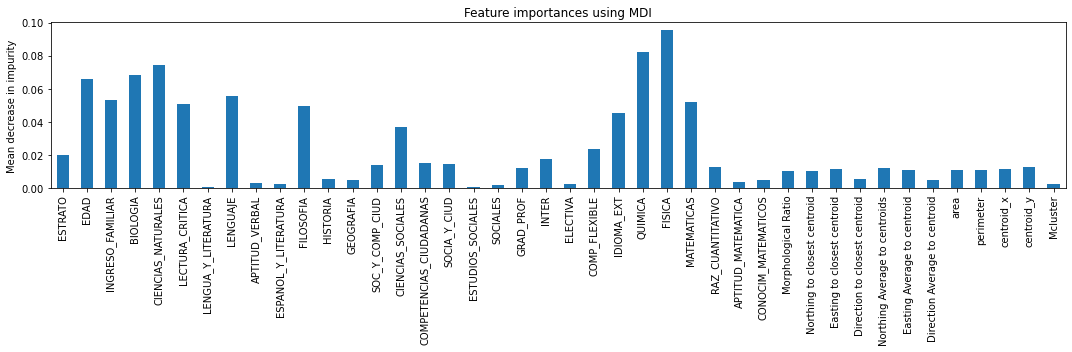

In [12]:
import pandas as pd

feature_names = list(num_cols.drop('DESERTED', axis=1).columns)

forest_importances = pd.Series(importances, index=feature_names)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots()
forest_importances.plot.bar(std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [13]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *
from IPython.core.display import display, HTML

In [26]:
# Only age, centroid_x, centroid_y and DESERTED

df_reduced = num_cols [['EDAD', 'centroid_x', 'centroid_y', 'DESERTED']]

# Test with spatial data
X = df_reduced.drop('DESERTED', axis=1) #X_Variables, all but the label
y = df_reduced['DESERTED']              #y_Labels to classify
X = np.nan_to_num(X)
y = np.nan_to_num(y)

clf = RandomForestClassifier(max_depth=3, random_state=0)
y_score = clf.fit(X, y)

X = X.reshape(-X.shape[0],X.shape[1])



feature_names = list(df_reduced.drop('DESERTED', axis=1).columns)


viz = dtreeviz(clf.estimators_[0], X, y,
               feature_names=feature_names,
               class_names=['Pass','Abandon'],
               scale=1.2
               #Max depth to be introduced in classificator
               )

viz

<img src="EdadVSBothCoordinates.png">

In [24]:
# Only age, centroid_x and DESERTED

df_reduced = num_cols [['EDAD', 'centroid_x', 'DESERTED']]

# Test with spatial data
X = df_reduced.drop('DESERTED', axis=1) #X_Variables, all but the label
y = df_reduced['DESERTED']              #y_Labels to classify
X = np.nan_to_num(X)
y = np.nan_to_num(y)

clf = RandomForestClassifier(max_depth=2, random_state=0)
y_score = clf.fit(X, y)

X = X.reshape(-X.shape[0],X.shape[1])



feature_names = list(df_reduced.drop('DESERTED', axis=1).columns)

viz = dtreeviz(clf.estimators_[3], X, y,
               feature_names=feature_names,
               class_names=['Pass','Abandon'],
               scale=2
               #Max depth to be introduced in classificator
               )

viz

<img src="EdadVSCentroidx.png">

In [25]:
# Only age, centroid_y and DESERTED

df_reduced = num_cols [['EDAD', 'centroid_y', 'DESERTED']]

# Test with spatial data
X = df_reduced.drop('DESERTED', axis=1) #X_Variables, all but the label
y = df_reduced['DESERTED']              #y_Labels to classify
X = np.nan_to_num(X)
y = np.nan_to_num(y)

clf = RandomForestClassifier(max_depth=2, random_state=0)
y_score = clf.fit(X, y)

X = X.reshape(-X.shape[0],X.shape[1])



feature_names = list(df_reduced.drop('DESERTED', axis=1).columns)

viz = dtreeviz(clf.estimators_[3], X, y,
               feature_names=feature_names,
               class_names=['Pass','Abandon'],
               scale=2
               #Max depth to be introduced in classificator
               )

viz

<img src="EdadVSCentroidy.png">

## 3.2. CLASSIFICATION TEST WITH MORE RELEVANT FEATURES

In [47]:
#Considering the feature importance, a predictive model with the most relevant features is made
#Leaving centroid_y and centroid_x as only spatial data

no_needed = ['DESERTED','LENGUA_Y_LITERATURA','APTITUD_VERBAL','ESPANOL_Y_LITERATURA','HISTORIA','GEOGRAFIA',
             'ESTUDIOS_SOCIALES','SOCIALES','ELECTIVA','APTITUD_MATEMATICA','CONOCIM_MATEMATICOS',
             'Morphological Ratio','Northing to closest centroid','Easting to closest centroid',
             'Direction to closest centroid','Northing Average to centroids','Easting Average to centroid',
             'Direction Average to centroid','area','perimeter','Mcluster']

X = num_cols.drop(no_needed, axis=1)     #X_Variables, all but the label
y = num_cols['DESERTED']                 #y_Labels to classify
X = np.nan_to_num(X)
y = np.nan_to_num(y)

clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X, y)

X = X.reshape(-X.shape[0],X.shape[1])
y_pred = clf.predict(X)
print('MAE', metrics.mean_absolute_error(y, y_pred))  
print('MSE', metrics.mean_squared_error(y, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print("-----------------------------------------------------")
print('Confusion Matrix:')
print(metrics.confusion_matrix(y, y_pred) )
print(metrics.classification_report(y, y_pred) )

MAE 0.0920296263541897
MSE 0.0920296263541897
RMSE: 0.30336385142958233
-----------------------------------------------------
Confusion Matrix:
[[7434  896]
 [ 769 8993]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      8330
           1       0.91      0.92      0.92      9762

    accuracy                           0.91     18092
   macro avg       0.91      0.91      0.91     18092
weighted avg       0.91      0.91      0.91     18092



In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import functools

def generate_rf(X,y):
    rf = RandomForestClassifier(max_depth=20)
    rf.fit(X,y)
    print ("rf score ", rf.score(X,y))
    return rf

def combine_rfs(rf_a, rf_b):
    rf_a.estimators_ += rf_b.estimators_
    rf_a.n_estimators = len(rf_a.estimators_)
    return rf_a

no_needed = ['DESERTED','LENGUA_Y_LITERATURA','APTITUD_VERBAL','ESPANOL_Y_LITERATURA','HISTORIA','GEOGRAFIA',
             'ESTUDIOS_SOCIALES','SOCIALES','ELECTIVA','APTITUD_MATEMATICA','CONOCIM_MATEMATICOS',
             'RAZ_CUANTITATIVO','GRAD_PROF','COMPETENCIAS_CIUDADANAS',
             'Morphological Ratio','Northing to closest centroid','Easting to closest centroid',
             'Direction to closest centroid','Northing Average to centroids','Easting Average to centroid',
             'Direction Average to centroid','area','perimeter','Mcluster']
X = num_cols.drop(no_needed, axis=1)     #X_Variables, all but the label
y = num_cols['DESERTED']                 #y_Labels to classify
X = np.nan_to_num(X)
y = np.nan_to_num(y)


# In the line below, we create 10 random forest classifier models
rfs = [generate_rf(X,y) for i in range(15)]

# In this step below, we combine the list of random forest models into one giant model
rf_combined = functools.reduce(combine_rfs, rfs)

# The combined model scores better than *most* of the component models
print ("rf combined score", rf_combined.score(X,y))

rf score  0.9087441963298696
rf score  0.9085783771832854
rf score  0.9091311076718992
rf score  0.908523104134424
rf score  0.9084125580367013
rf score  0.9069201857174441
rf score  0.9082467388901172
rf score  0.909407472916206
rf score  0.908080919743533
rf score  0.909241653769622
rf score  0.9064227282776918
rf score  0.9081361927923944
rf score  0.9060358169356622
rf score  0.908080919743533
rf score  0.9070860048640284
rf combined score 0.9104023877957108


In [81]:
X = X.reshape(-X.shape[0],X.shape[1])
y_pred = rf_combined.predict(X)
print('MAE', metrics.mean_absolute_error(y, y_pred))  
print('MSE', metrics.mean_squared_error(y, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print("-----------------------------------------------------")
print('Confusion Matrix:')
print(metrics.confusion_matrix(y, y_pred) )
print(metrics.classification_report(y, y_pred) )

MAE 0.08959761220428919
MSE 0.08959761220428919
RMSE: 0.29932860238254744
-----------------------------------------------------
Confusion Matrix:
[[7481  849]
 [ 772 8990]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      8330
           1       0.91      0.92      0.92      9762

    accuracy                           0.91     18092
   macro avg       0.91      0.91      0.91     18092
weighted avg       0.91      0.91      0.91     18092



C:\Users\Alejandro\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


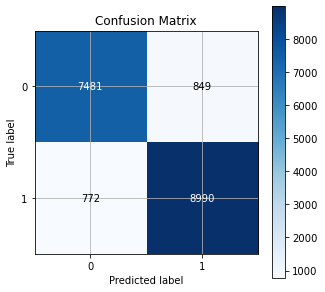

In [82]:
import scikitplot.plotters as skplt
plt.rcParams['figure.figsize'] = [5, 5]
skplt.plot_confusion_matrix(y, y_pred)
plt.show()

In [83]:
import time
import numpy as np

start_time = time.time()
importances = rf_combined.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rf_combined.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.364 seconds


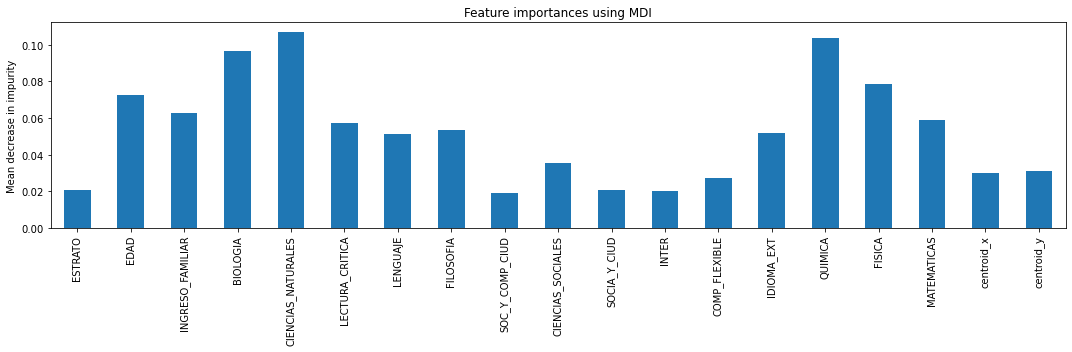

In [85]:
import pandas as pd

no_needed = ['DESERTED','LENGUA_Y_LITERATURA','APTITUD_VERBAL','ESPANOL_Y_LITERATURA','HISTORIA','GEOGRAFIA',
             'ESTUDIOS_SOCIALES','SOCIALES','ELECTIVA','APTITUD_MATEMATICA','CONOCIM_MATEMATICOS',
             'RAZ_CUANTITATIVO','GRAD_PROF','COMPETENCIAS_CIUDADANAS',
             'Morphological Ratio','Northing to closest centroid','Easting to closest centroid',
             'Direction to closest centroid','Northing Average to centroids','Easting Average to centroid',
             'Direction Average to centroid','area','perimeter','Mcluster']

feature_names = list(num_cols.drop(no_needed, axis=1).columns)

forest_importances = pd.Series(importances, index=feature_names)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots()
forest_importances.plot.bar(std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## 4. DECISION AND SURFDECISION BOUNDARIES

In [88]:
def plot_decision_boundary(X,y,X_extend,y_extend):
    plt.rcParams['figure.figsize'] = [15, 10]
    
    clf = RandomForestClassifier(max_depth=50, random_state=0)
    clf.fit(X, y)
    
    x_min, x_max = X[:, 0].min()-X_extend, X[:, 0].max()+X_extend
    y_min, y_max = X[:, 1].min()-y_extend, X[:, 1].max()+y_extend
    h=80 # mesh step

    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    z=clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:, 1]
    z=z.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    
    surface = ax.contourf(xx, yy, z, cmap='RdBu', alpha=0.8)
    points = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu')
    legend1 = ax.legend(*points.legend_elements(),
                    loc="upper right", title="Deserting Tendency")
    #geodata.plot(color='none', edgecolor='black', ax=ax)

### Age VS Morphologial Ratio

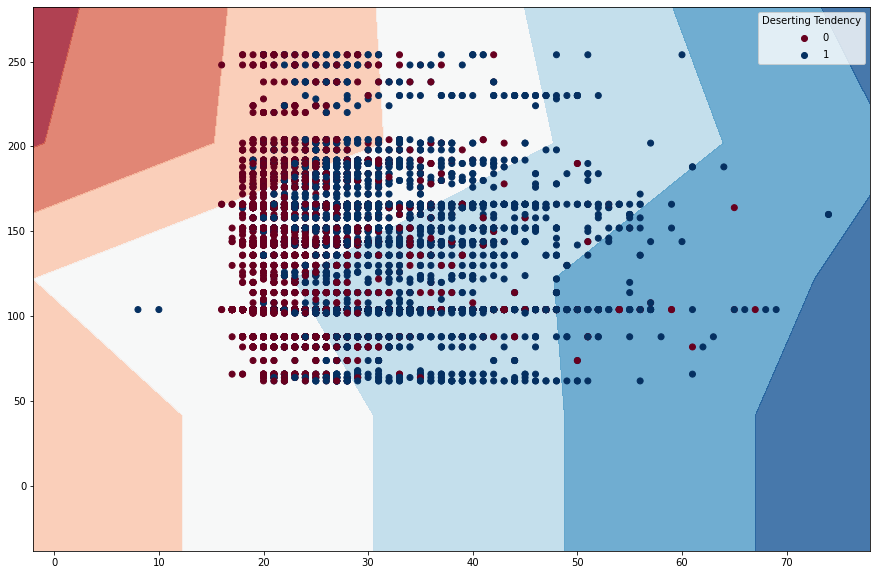

In [102]:
X = np.vstack((num_cols['EDAD'], num_cols['Morphological Ratio']*200)).T
plot_decision_boundary(X,y,10,100)

Morphological ratio does not generate big impact during the decission, while the age gradient becomes constant (people under 23 or 25 years old have tendency to pass, while older people to abandon)

### Age VS Mean Shift Clustering

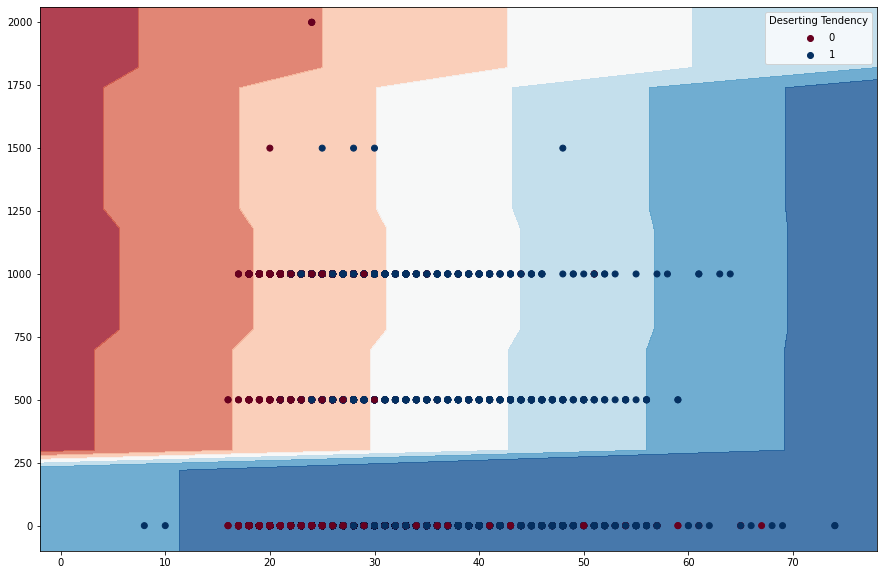

In [99]:
X = np.vstack((num_cols['EDAD'], num_cols['Mcluster']*500)).T
plot_decision_boundary(X,y,10,100)

Meanshift clustering does not generate big impact on the decision along the age but the Meanshift label 0. In this group of municipalities (the small municipalities cluster conformed in the mountains) there is a tendency to abandon independently from the age.

### Age VS Centroid_y Coordinates

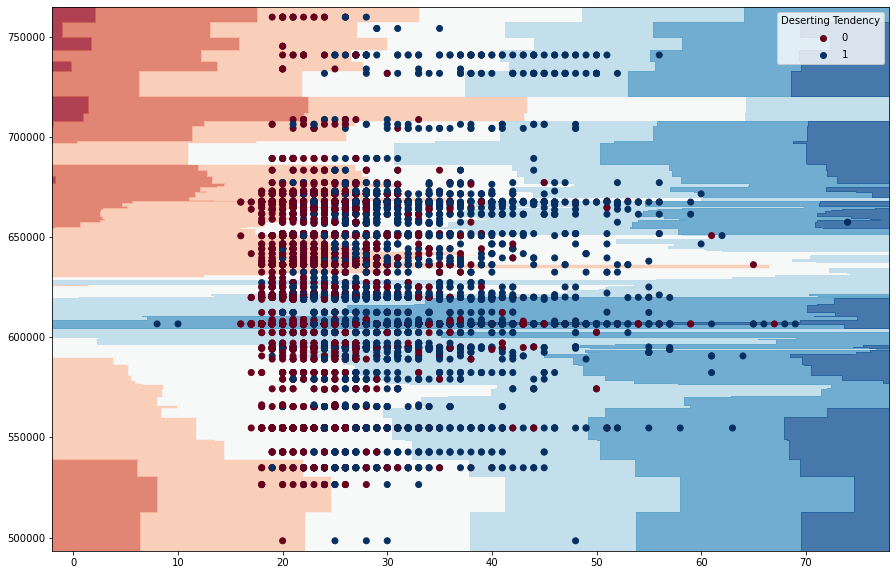

In [106]:
X = np.vstack((num_cols['EDAD'], num_cols['centroid_y'])).T
plot_decision_boundary(X,y,10,5000)

Even when the abandon probabilities seem to increase when the students are older, there is a space disturbance along the coordintes y = 605000, where the tendency is to abandon independently from the age.

### Age VS Centroid_x Coordinates

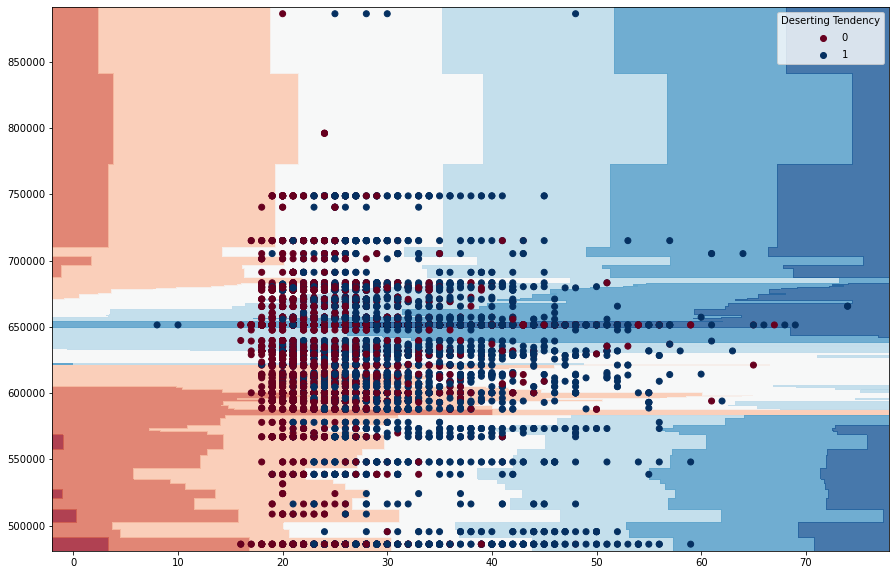

In [107]:
X = np.vstack((num_cols['EDAD'], num_cols['centroid_x'])).T
plot_decision_boundary(X,y,10,5000)

Likewise, there is a space disturbance along the coordintes x = 650000, where the tendency is to abandon independently from the age.

### Stratum VS Centroid_y Coordinates

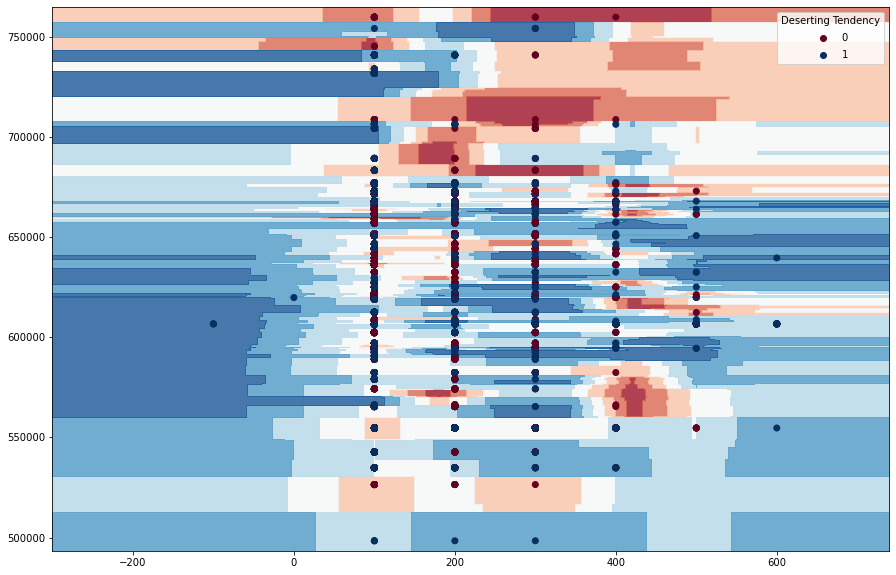

In [112]:
X = np.vstack((num_cols['ESTRATO']*100, num_cols['centroid_y'])).T
plot_decision_boundary(X,y,200,5000)

Comparing the spatial disturbances along the economical stratum gives a noisy output, not providing useful information.

### GeoDecision Surfaces

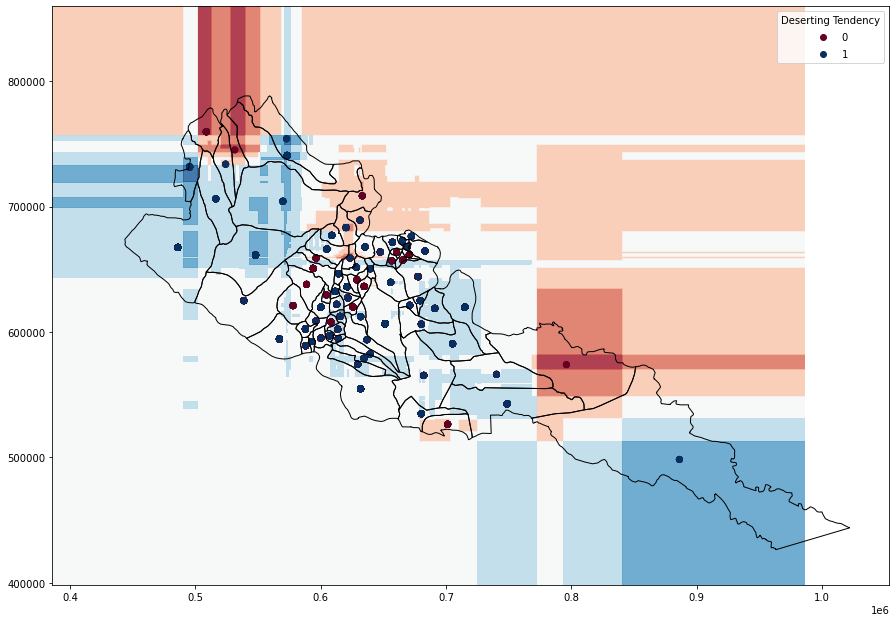

In [54]:
def plot_surfdecision_boundary(X,y):
    plt.rcParams['figure.figsize'] = [15, 15]
    
    clf = RandomForestClassifier(max_depth=50, random_state=0)
    clf.fit(X, y)
    extend = 100000
    x_min, x_max = X[:, 0].min()-extend, X[:, 0].max()+extend
    y_min, y_max = X[:, 1].min()-extend, X[:, 1].max()+extend
    h=80 # mesh step

    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    z=clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:, 1]
    z=z.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    
    surface = ax.contourf(xx, yy, z, cmap='RdBu', alpha=0.8)
    points = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu')
    legend1 = ax.legend(*points.legend_elements(),
                    loc="upper right", title="Deserting Tendency")
    geodata.plot(color='none', edgecolor='black', ax=ax)
    
X = np.vstack((num_cols['centroid_x'], num_cols['centroid_y'])).T
plot_surfdecision_boundary(X,y)

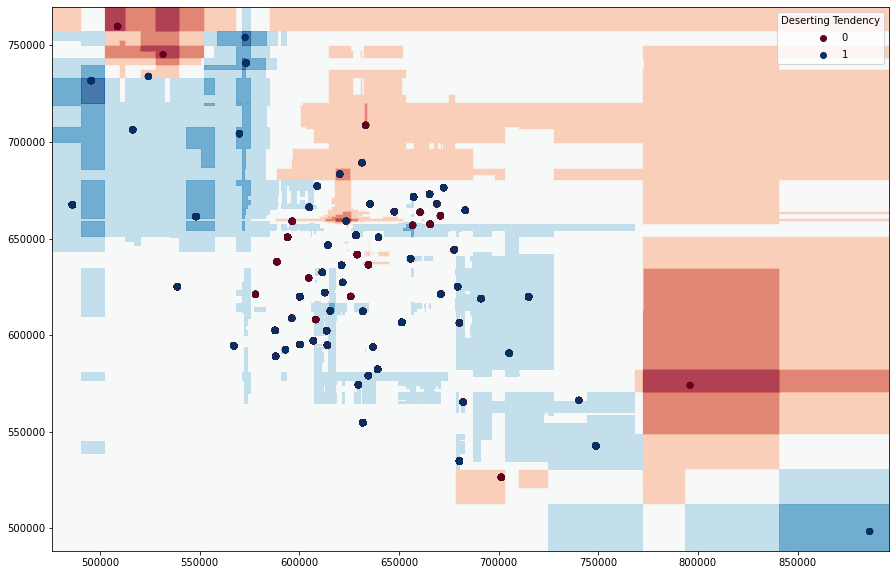

In [10]:
#Centroids x and y predictive model without map background

X = np.vstack((num_cols['centroid_x'], num_cols['centroid_y'])).T
plot_decision_boundary(X,y,10000,10000)